In [1]:
from IPython.display import HTML

HTML("""<style>
.lev1 {margin-left: 80px}
.lev2 {margin-left: 100px}
.lev3 {margin-left: 120px}
.lev4 {margin-left: 140px}
.lev5 {margin-left: 160px}
.lev6 {margin-left: 180px}
</style>""")

<center>
    <big>
        <b>
             SCALING RELATIONS
         </b>
     </big>
    <p>
         In this notebook we investigate how the relevant quantities in scales among each other, and
         trying therefore to find some 'scaling laws' for research funds
    </p>
</center>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Loading-datasets" data-toc-modified-id="Loading-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading datasets</a></div><div class="lev2 toc-item"><a href="#data-pre-processing" data-toc-modified-id="data-pre-processing-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>data pre-processing</a></div><div class="lev1 toc-item"><a href="#Institutions-scalings" data-toc-modified-id="Institutions-scalings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Institutions scalings</a></div><div class="lev2 toc-item"><a href="#grants-VS-people,-per-Inst" data-toc-modified-id="grants-VS-people,-per-Inst-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>grants VS people, per Inst</a></div><div class="lev1 toc-item"><a href="#Grants-scalings" data-toc-modified-id="Grants-scalings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Grants scalings</a></div><div class="lev2 toc-item"><a href="#get-grouped-grants-data" data-toc-modified-id="get-grouped-grants-data-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>get grouped grants data</a></div><div class="lev3 toc-item"><a href="#add-number-of-publications" data-toc-modified-id="add-number-of-publications-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>add <strong>number of publications</strong></a></div><div class="lev3 toc-item"><a href="#add-grant-amount-(CHF)" data-toc-modified-id="add-grant-amount-(CHF)-312"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>add grant <strong>amount</strong> (CHF)</a></div><div class="lev3 toc-item"><a href="#add--number-of-people" data-toc-modified-id="add--number-of-people-313"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>add <strong> number of people</strong></a></div><div class="lev3 toc-item"><a href="#add-grant-duration---to-be-fixed!" data-toc-modified-id="add-grant-duration---to-be-fixed!-314"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>add grant duration - to be fixed!</a></div><div class="lev2 toc-item"><a href="#people-VS-grants-size" data-toc-modified-id="people-VS-grants-size-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>people VS grants size</a></div><div class="lev2 toc-item"><a href="#publications-VS-grants-volume" data-toc-modified-id="publications-VS-grants-volume-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>publications VS grants volume</a></div><div class="lev2 toc-item"><a href="#publications-VS-people-involved" data-toc-modified-id="publications-VS-people-involved-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>publications VS people involved</a></div><div class="lev2 toc-item"><a href="#3d-plot-of-grants" data-toc-modified-id="3d-plot-of-grants-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>3d plot of grants</a></div><div class="lev2 toc-item"><a href="#people-VS-duration" data-toc-modified-id="people-VS-duration-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>people VS duration</a></div><div class="lev2 toc-item"><a href="#pub-VS-duration" data-toc-modified-id="pub-VS-duration-37"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>pub VS duration</a></div><div class="lev2 toc-item"><a href="#grants-overview" data-toc-modified-id="grants-overview-38"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>grants overview</a></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import powerlaw # for docs, please refer to: http://pythonhosted.org/powerlaw/

sns.set_context('notebook')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import gc

# Loading datasets

In [3]:
publications = pd.read_csv('./data_SNSF/P3_PublicationExport.csv',sep=';')

print(publications.shape)
publications.head(2)

(82472, 26)


,Publication ID SNSF,Project Number,Peer Review Status,Type of Publication,Title of Publication,Authors,Status,Publication Year,ISBN,DOI,...,Publisher,Editors,Journal Title,Volume,Issue / Number,Page from,Page to,Proceeding Title,Proceeding Place,Abstract
0,{3001D662-AD1B-43DA-8BA2-5ADC25C9C347},1094,Peer-reviewed,Book (peer-reviewed),Platos Idee des Guten,Ferber Rafael,Published,2015.0,978-3-89665-666-7,NaN,...,"Academia Verlag ,St. Augustin",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,At the centre of the monograph (1984 first ed...
1,{3F5669B1-C09F-4486-87FF-21A561C15B8A},20108,Peer-reviewed,Original article (peer-reviewed),"MICROSTRUCTURE, LATTICE-PARAMETERS, AND SUPERC...","Xu Y. W., Suenaga M., Tafto J., Sabatini R....",Published,1989.0,NaN,10.1103/PhysRevB.39.6667 ...,...,NaN,NaN,Physical Review B,39,10,6667,6680,NaN,NaN,NaN


In [4]:
grants = pd.read_csv('./data_SNSF/P3_GrantExport.csv',sep=';')

print(grants.shape)
grants.head(2)

(65670, 17)


/Users/lazzari/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,Nicht zuteilbar - NA,10302,Swiss history,Human and Social Sciences;Theology & religious...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Université de Genève - GE,10104,Educational science and Pedagogy,"Human and Social Sciences;Psychology, educatio...",10104,01.10.1975,30.09.1976,41022.00,NaN


In [5]:
persons = pd.read_csv('./data_SNSF/P3_PersonExport.csv',sep=';')
print(persons.shape)
persons.head(2)

(93565, 13)


,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,ORCID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person
0,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN
1,a Marca,Davide,male,NaN,NaN,53856,NaN,NaN,NaN,NaN,NaN,36549,NaN


In [6]:
grants = pd.read_csv('./data_SNSF/P3_GrantExport.csv',sep=';')

print(grants.shape)
grants.head(2)

(65670, 17)


/Users/lazzari/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,Nicht zuteilbar - NA,10302,Swiss history,Human and Social Sciences;Theology & religious...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Université de Genève - GE,10104,Educational science and Pedagogy,"Human and Social Sciences;Psychology, educatio...",10104,01.10.1975,30.09.1976,41022.00,NaN


## data pre-processing

In [7]:
# the amount it's originally a string! ==> need type conversion
type(grants.loc[1,'Approved Amount'])

str

mind that there are _quite some grants with no specified amount_:

In [8]:
sum(grants['Approved Amount']=='data not included in P3')

11313

...and some grants amount are __= 0__:

In [9]:
sum(grants['Approved Amount']=='0.00')

87

In [10]:
# replacing bad string
grants['Approved Amount'].replace(['data not included in P3','0.00'],np.nan,inplace=True,regex=True);
# converting to float
grants['Approved Amount'] = grants['Approved Amount'].astype(float)
# computing total amount
print( 'total amount of grants (bill. CHF):',round(grants['Approved Amount'].sum()/1000000000,3))

total amount of grants (bill. CHF): 9.058


double-check the field data type:

In [11]:
grants['Approved Amount'].dtype

dtype('float64')

double-check for `amount = 0`:

In [12]:
sum(grants['Approved Amount']==0)

0

In [13]:
grants['Approved Amount'].isnull().sum() / grants.shape[0]

0.53101873001370492

# Institutions scalings

## grants VS people, per Inst

(would be more interesting to study this, _per grant_, instead of _per institution_)

In [16]:
# this is indeed THE identifier for people
persons['Person ID SNSF'].isnull().sum() 

0

Mind the high fraction of `NaN`  ---> __big sub-sampling __ in people affiliation

In [17]:
persons['Institute Name'].isnull().sum() / persons.shape[0]

0.52689574092876612

low fraction of `NaN`  ---> small sub-sampling in grants affiliation

In [12]:
grants.Institution.isnull().sum() / grants.shape[0]

0.080402010050251257

Of course data are never perfect: __the number of institutions is not the same__ in the 2 datasets

In [13]:
print(persons['Institute Name'].nunique())

persons.loc[persons['Institute Name'].notnull(),'Institute Name'].head()

15509


5     Abteilung Biophysikalische Chemie Biozentrum d...
6     Clinique de Genolier F.M.H. Oncologie-Hématolo...
8     Stavanger University Hospital Section of Geria...
9     Lehrstuhl für Pflanzenphysiologie Universität ...
12    Service de Psychiatrie Adulte Département de P...
Name: Institute Name, dtype: object

In [14]:
print(grants.Institution.nunique())

grants.loc[grants.Institution.notnull(),'Institution'].head()

13538


1    Faculté de Psychologie et des Sciences de l'Ed...
2    Kommission für das Corpus philosophorum medii ...
3    Abt. Handschriften und Alte Drucke Bibliothek ...
4                         Schweiz. Thesauruskommission
5    Séminaire de politique économique, d'économie ...
Name: Institution, dtype: object

count pp in institutes with `groupby` and shape it in a `dataframe`

In [7]:
institutes_df = pd.DataFrame(persons.groupby(['Institute Name']).size(),
                               columns=['num_people'])

add column with counts of grants across institutes  - with `groupby` 

In [8]:
institutes_df['num_grants'] = grants.groupby('Institution').size()

institutes_df.dropna().head(3)

,num_people,num_grants
Institute Name,,
A & o conresearch Toggwil,1,1.0
A.N.Nesmeyanov Institute of Organoelement Compounds,1,2.0
"A.N.Severtzov Institute of problems of evaluation, Russian Academy of Sciences",1,1.0


in the plot there should be 6911 dots:

In [9]:
institutes_df.notnull().sum()

num_people    15509
num_grants     6911
dtype: int64

drop nans:

In [10]:
institutes_df.dropna(inplace=True)

prepare data for fit:

In [11]:
logx = np.log10(institutes_df.num_people)
logy = np.log10(institutes_df.num_grants)

In [12]:
from scipy import optimize

actual fit :    
(credits to [this eaxmple](http://scipy-cookbook.readthedocs.io/items/FittingData.html))

In [13]:
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x))

pinit = [1.0, 2.0]
out = optimize.least_squares(errfunc, pinit,args=(logx, logy,));


print('fitted coefficient:', out['x'][0])
print('fitted expo:',out['x'][1])

fitted coefficient: 0.0779115994089
fitted expo: 0.9119839514


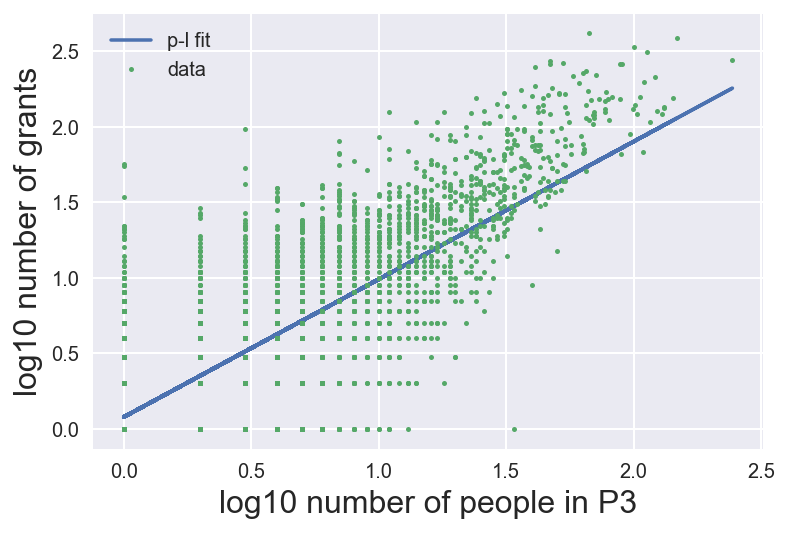

In [14]:
plt.plot(logx,fitfunc(out['x'],logx),label='p-l fit') 
plt.plot(logx,logy,marker='.',linestyle='',ms=5,label='data')

# plt.loglog(institutes_df.num_people,institutes_df.num_grants,


plt.legend()
plt.xlabel('log10 number of people in P3',size=16)
plt.ylabel('log10 number of grants',size=16); 

plt.savefig('./plots_for_paper/people_VS_grants.pdf',bbox_inches='tight')

# Grants scalings

How data are connected:    
(one dot will represent one grant)
    
`people`[roles in grants --> grant numbers]   <--->   `grants`['Project Number'] <--->   `publications`['Project Number']

## get grouped grants data

check unique grants in `publications` and `grants` dataset:

In [14]:
print('number of unique projects in publications dataset:',publications['Project Number'].nunique())
print('number of unique projects in grants dataset:',grants['Project Number'].nunique())

number of unique projects in publications dataset: 11311
number of unique projects in grants dataset: 65670


as one can see from the number below,  __all the grants projects in `publications` are also in `grants`__:    
(therefore we should have 11311 data-points to fit!)

In [33]:
%time sum(g in grants['Project Number'].unique() for g in publications['Project Number'].unique())

CPU times: user 15.3 s, sys: 2.08 s, total: 17.4 s
Wall time: 17.4 s


11311

### add __number of publications__

In [15]:
grouped_by_grants_df = pd.DataFrame(publications.groupby(['Project Number']).size(),
                               columns=['num_pub'])
# grants_pub_df = 

### add grant __amount__ (CHF) 

In [17]:
trial_amount = grants[['Approved Amount','Project Number']]
# set correctly the project as index
trial_amount.set_index('Project Number',inplace=True)

# merge the 2 new df
grouped_by_grants_df['amount'] = trial_amount['Approved Amount']

# eliminate useless var
del trial_amount
gc.collect()

# show new df
grouped_by_grants_df.head(2)

,num_pub,amount
Project Number,,
1094,1,NaN
20108,2,NaN


list of roles in dataset:

In [21]:
roles = ['Projects as responsible Applicant', 'Projects as Applicant',
       'Projects as Partner', 'Projects as Practice Partner',
       'Projects as Employee', 'Projects as Contact Person']

### add __ number of people__

In [22]:
%%time

people_grant_list = []

for row in persons.itertuples():
    
    for r in roles:
        
        # unfortunately, some fields are 'str' some other are 'float' - by default
        people_grant_list.append(str(persons.loc[row.Index,r]).split(';'))

# gotta flat the list - as it's a list of list:
people_grant_list = [item for sublist in people_grant_list for item in sublist]

# we only care about counting occurencies (people), per grant:
people_per_grant = pd.Series(people_grant_list).value_counts()

# removing 'nan'
people_per_grant.drop('nan',inplace=True)

# delete useless var
del people_grant_list
gc.collect()

CPU times: user 1min 36s, sys: 358 ms, total: 1min 36s
Wall time: 1min 37s


these two number should be similar indeed:

In [23]:
print('grants in people dataset:',people_per_grant.shape[0])
print('grants in grants dataset:',grants['Project Number'].nunique())

grants in people dataset: 65653
grants in grants dataset: 65670


add  # people / grant to new dataset:

In [25]:
# gotta first convert the index to numeric!:
people_per_grant.index = pd.to_numeric(people_per_grant.index)

# add new columns to main df
grouped_by_grants_df['num_people'] = pd.DataFrame(people_per_grant)

# remove useless var
del people_per_grant
gc.collect()

overview of the new dataframe for grouped grants data:

In [32]:
print(grouped_by_grants_df.shape)
print('\n number of nulls values:\n',grouped_by_grants_df.isnull().sum())
grouped_by_grants_df.head()

(11311, 3)

 number of nulls values:
 num_pub          0
amount        5933
num_people       0
dtype: int64


,num_pub,amount,num_people
Project Number,,,
1094,1,NaN,1
20108,2,NaN,1
25095,2,NaN,1
29591,1,NaN,1
36263,9,338592.0,7


### add grant duration - to be fixed!

need first to transform the data type:

In [130]:
grants['End Date'] = pd.to_datetime(grants['End Date'])
grants['Start Date'] = pd.to_datetime(grants['Start Date'])

there are issues with 637 grants, for which `End Date` < `Start Date`:

In [131]:
sum(grants['End Date'] < grants['Start Date'])

637

...for safety, we decide to use only the good ones, in a new df:

In [137]:
grants_clean = grants[['Project Number','Start Date','End Date']].drop(grants[grants['End Date'] < grants['Start Date']].index)

# set index of new df:

grants_clean.index = grants_clean['Project Number']

# check dimensions
print('original grants dataset:',grants.shape)
print('cleaned grants dataset:',grants_clean.shape)

original grants dataset: (65670, 17)
cleaned grants dataset: (65033, 3)


In [144]:
#  default deltas are in ns --> assuming 30 days / months...

grouped_by_grants_df['duration'] = pd.to_numeric(pd.to_timedelta(grants_clean['End Date']  - \
                                                                 grants_clean['Start Date'],unit='d') / \
                                                 (10**(9) * 3600  * 24  * 30)) 

# del useless var
del grants_clean
gc.collect()

2917

In [146]:
print(grouped_by_grants_df.shape)
print(grouped_by_grants_df.isnull().sum())

grouped_by_grants_df.head(3)

(11311, 4)
num_pub          0
amount        5933
num_people       0
duration         1
dtype: int64


,num_pub,amount,num_people,duration
Project Number,,,,
1094,1,NaN,1,33.0
20108,2,NaN,1,17.0
25095,2,NaN,1,19.0


## people VS grants size

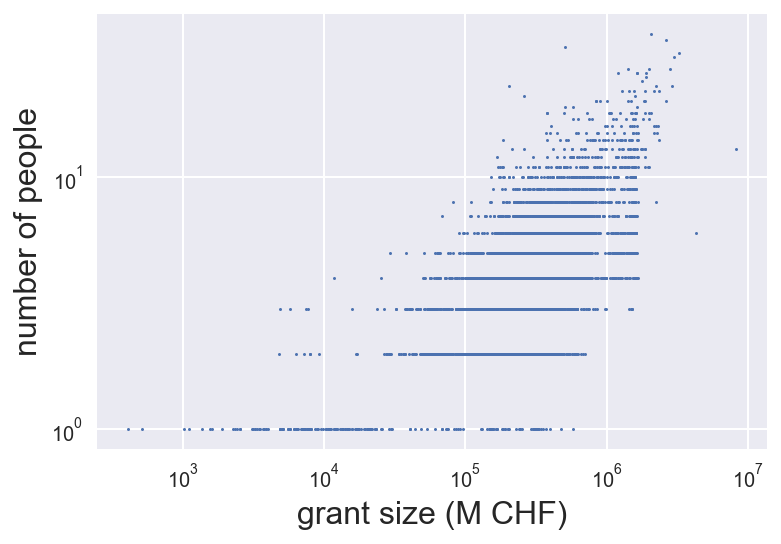

In [53]:
# linear scales - subset
# my_subset = grouped_by_grants_df.amount < 2000000 
# plt.plot(grouped_by_grants_df.amount[my_subset]/1000000,
#          grouped_by_grants_df.num_people[my_subset],

# linear scales 
# plt.plot(grouped_by_grants_df.amount,

# log scale 
plt.loglog(grouped_by_grants_df.amount,
         grouped_by_grants_df.num_people,
         marker='.',linestyle='',label='data',ms=3)


plt.ylabel('number of people',size=16)
plt.xlabel('grant size (M CHF)',size=16);

# plt.savefig('./plots_for_paper/people_VS_amount.pdf',bbox_inches='tight')
# plt.savefig('./plots_for_paper/people_VS_amount_linear_subset.pdf',bbox_inches='tight')

In [55]:
print('number of unique values for number of people:',grouped_by_grants_df.num_people.nunique())

number of unique values for number of people: 36


in order to take the `mean` of the smallest 5 grant amounts, for each value of  `num_people`, let's say we need __at least 10__ data-points = # grants, per `num_people`

In [56]:
counts_df = grouped_by_grants_df.groupby('num_people').size()

counts_df[counts_df>=10]

num_people
1     3181
2     1754
3     1633
4     1425
5     1010
6      744
7      490
8      303
9      191
10     147
11      99
12      67
13      55
14      38
15      27
16      22
17      18
18      22
20      19
22      12
23      10
dtype: int64

that means ... __grants with max 23 people__    
(that means that _above_ this threshold, the boundary would be too unreliable )

....let's take the average of the 5-smallest grant volumes     
( __5__ has to be check if it's a robust choice...!!)

In [58]:
# here there are different operations, concatenated, thanks to pandas ;)

# 0 - select only num_pub with enough grants (>=10 <==> <= 42 publication/grant )
# 1 - groupby pub number
# 2 - take only the grants with 5 smallest amount
# 3 - take the mean for each pub number

grants_for_fit  = pd.DataFrame(grouped_by_grants_df[grouped_by_grants_df.num_people<=23].\
                               groupby('num_people')['amount'].\
                               nsmallest(5)).\
                mean(level=0)

#  adjust the columns
grants_for_fit['num_people'] = grants_for_fit.index

# fix col names
grants_for_fit.columns = ['ave_five_amount', 'num_people']

grants_for_fit.head()

,ave_five_amount,num_people
num_people,,
1,887.522,1
2,6866.000,2
3,8317.960,3
4,38005.000,4
5,48488.400,5


try to fit:   
(mind that this fit is not really correct, as indeed the _ amount should be the 'y'_ ...)

In [59]:
logx = np.log10(grants_for_fit.ave_five_amount)
logy = np.log10(grants_for_fit.num_people)

In [60]:
from scipy import optimize

In [61]:
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x))

pinit = [1.0, 2.0]
out = optimize.least_squares(errfunc, pinit,args=(logx, logy,));


print('fitted coefficient:', out['x'][0])
print('fitted expo:',out['x'][1])

fitted coefficient: -1.28714637678
fitted expo: 0.428364479264


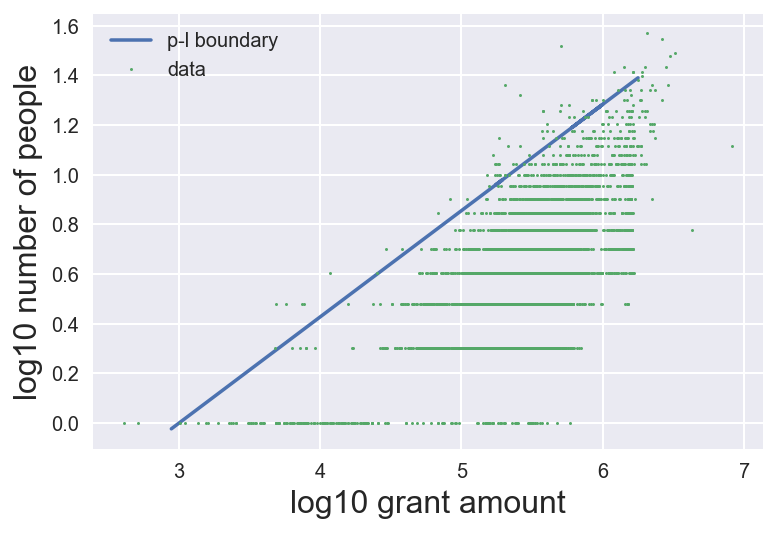

In [62]:
plt.plot(logx,fitfunc(out['x'],logx),label='p-l boundary') 
# plt.plot(logx,logy,marker='.',linestyle='',ms=5,label='data')

# plt.loglog(institutes_df.num_people,institutes_df.num_grants,

plt.plot(np.log10(grouped_by_grants_df.amount),
         np.log10(grouped_by_grants_df.num_people),
         marker='.',linestyle='',ms=3,label='data')



plt.legend()
plt.ylabel('log10 number of people',size=16)
plt.xlabel('log10 grant amount',size=16); 

plt.savefig('./plots_for_paper/people_VS_amount.pdf',bbox_inches='tight')

## publications VS grants volume

(here the idea is to investigate how much of the resources are used for publications -    
vice-versa: how publications scales with resources)

plot and fit:

there seems to be an _interesting upper-boundary_!!    

(an idea to estimate can be taken from
[this paper](http://www.pnas.org/content/suppl/2013/12/04/1311124110.DCSupplemental/sapp.pdf))

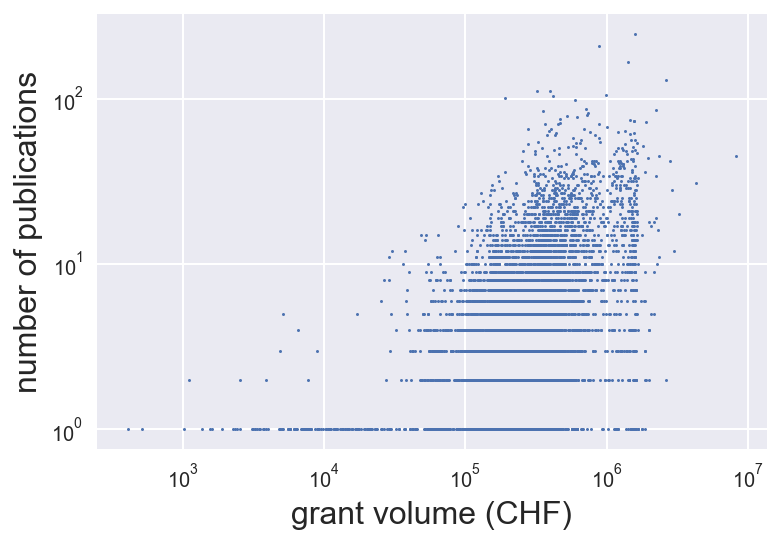

In [20]:
# in case you wanna zoom in the lower-left part of the plot:

# my_subset = (np.log10(grants_pub_df.amount) < 6.5) & (grants_pub_df.num_pub < 100)
# plt.plot(grants_pub_df.amount[my_subset],grants_pub_df.num_pub[my_subset],

# to have a view of the whole dataset, better log-log:

plt.loglog(grouped_by_grants_df.amount,grouped_by_grants_df.num_pub,
         marker='.',linestyle='',ms=3,label='data')

# plt.axvline(x=1600000,c='g')

plt.xlabel('grant volume (CHF)',size=16)
plt.ylabel('number of publications',size=16); 
# plt.legend()

# sns.jointplot(grants_pub_df.amount,grants_pub_df.num_pub,s=3)

prepare data for fit:

In [34]:
print('there are',grouped_by_grants_df.num_pub.nunique(), 'of unique numbers of publications')

there are 104 of unique numbers of publications


in order to take the `mean` of 5 grant amounts, for each value of  `num_pub`, let's say we need __at least 10__ data-points = # grants, per `num_pub`

In [35]:
counts_df = grouped_by_grants_df.groupby('num_pub').size()

counts_df[counts_df>=10]

num_pub
1     2522
2     1407
3     1194
4      935
5      778
6      623
7      544
8      419
9      364
10     297
11     245
12     243
13     210
14     149
15     150
16     107
17      99
18      92
19      86
20      88
21      72
22      49
23      48
24      53
25      43
26      35
27      39
28      23
29      29
30      26
31      12
32      24
33      23
34      28
35      20
36      10
37      10
38      17
39      13
41      12
42      15
dtype: int64

that means ... __grants with max 42 publications__    
(that means that _above_ this threshold, the boundary would be too unreliable )

....let's take the average of the 5-smallest grant volumes     
( __5__ has to be check if it's a robust choice...!!)

In [36]:
# here there are different operations, concatenated, thanks to pandas ;)

# 0 - select only num_pub with enough grants (>=10 <==> <= 42 publication/grant )
# 1 - groupby pub number
# 2 - take only the grants with 5 smallest amount
# 3 - take the mean for each pub number

grants_for_fit  = pd.DataFrame(grouped_by_grants_df[grouped_by_grants_df.num_pub<=42].\
                               groupby('num_pub')['amount'].\
                               nsmallest(5)).\
                mean(level=0)

#  adjust the columns
grants_for_fit['num_pub'] = grants_for_fit.index

# fix col names
grants_for_fit.columns = ['ave_five_amount', 'num_pub']

grants_for_fit.head()

,ave_five_amount,num_pub
num_pub,,
1,977.722,1
2,8526.160,2
3,25210.908,3
4,34527.400,4
5,28139.000,5


try to fit:   
(mind that this fit is not really correct, as indeed the _ amount should be the 'y'_ ...)

In [37]:
logx = np.log10(grants_for_fit.ave_five_amount)
logy = np.log10(grants_for_fit.num_pub)

In [38]:
from scipy import optimize

In [39]:
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x))

pinit = [1.0, 2.0]
out = optimize.least_squares(errfunc, pinit,args=(logx, logy,));


print('fitted coefficient:', out['x'][0])
print('fitted expo:',out['x'][1])

fitted coefficient: -2.16355202487
fitted expo: 0.654035846172


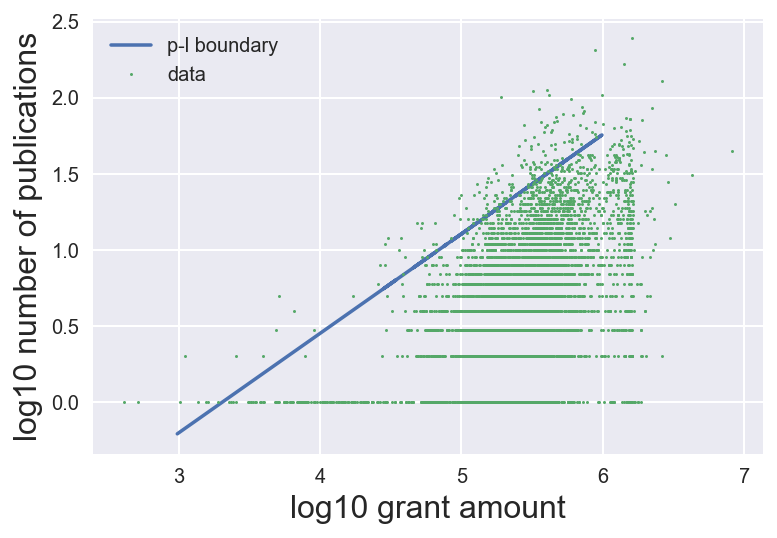

In [40]:
plt.plot(logx,fitfunc(out['x'],logx),label='p-l boundary') 
# plt.plot(logx,logy,marker='.',linestyle='',ms=5,label='data')

# plt.loglog(institutes_df.num_people,institutes_df.num_grants,

plt.plot(np.log10(grouped_by_grants_df.amount),
         np.log10(grouped_by_grants_df.num_pub),
         marker='.',linestyle='',ms=3,label='data')



plt.legend()
plt.ylabel('log10 number of publications',size=16)
plt.xlabel('log10 grant amount',size=16); 

plt.savefig('./plots_for_paper/pub_VS_amount.pdf',bbox_inches='tight')

## publications VS people involved

fitting and plotting the distribution of # people, per single grant:

In [41]:
fit_people_grants = powerlaw.Fit(grouped_by_grants_df.num_people,discrete=True)

# print('fitted parameters for power-law:')
print('fitted exponent:',fit_people_grants.alpha)
print('fitting error:',fit_people_grants.sigma)

print('xmin of the fit:',fit_people_grants.xmin)
print('xmax of the fit:',fit_people_grants.xmax)

fitted exponent: 3.71943768509
fitting error: 0.0687639375459
xmin of the fit: 7.0
xmax of the fit: None


Calculating best minimal value for power law fit
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


a `lognormal` model fits significantly better...:

In [42]:
fit_people_grants.distribution_compare('power_law','lognormal')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(-6.8455386647441614, 0.010575396373005924)

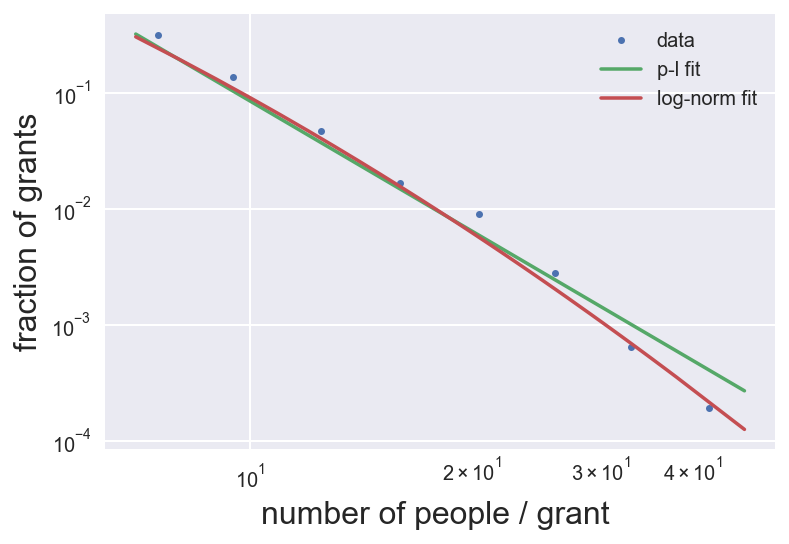

In [46]:
# plt.loglog(people_per_grant.value_counts(),marker='.',linestyle='',label='data')
# powerlaw.plot_pdf(people_per_grant,marker='.',linestyle='',label='data')

fit_people_grants.plot_pdf(marker='.',linestyle='',label='data')
fit_people_grants.power_law.plot_pdf(label='p-l fit')
fit_people_grants.lognormal.plot_pdf(label='log-norm fit')

plt.legend()

plt.xlabel('number of people / grant ',size=16)
plt.ylabel('fraction of grants',size=16)

plt.savefig('./plots_for_paper/people_per_grant.pdf',bbox_inches='tight')

 plot scaling : _no correlation_ seems to be present

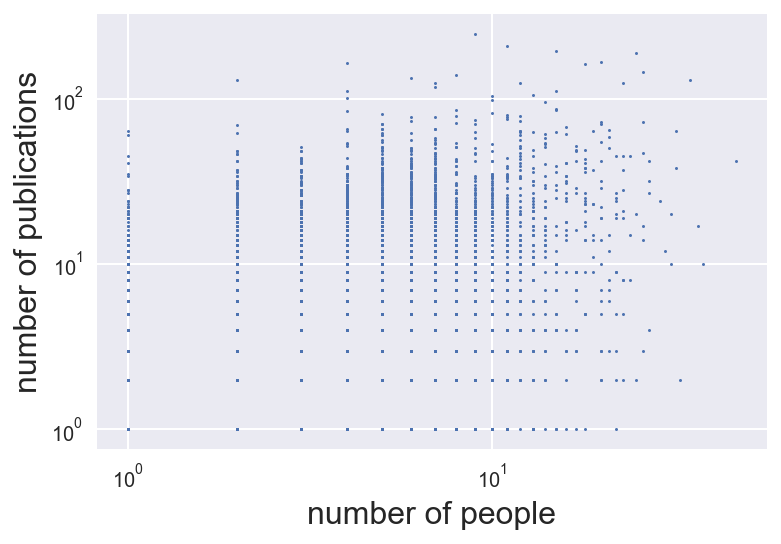

In [45]:
plt.loglog(grouped_by_grants_df.num_people,grouped_by_grants_df.num_pub,
         marker='.',linestyle='',label='data',ms=3)
#         alpha=0.2)


plt.xlabel('number of people',size=16)
plt.ylabel('number of publications',size=16)

plt.savefig('./plots_for_paper/pub_VS_people.pdf',bbox_inches='tight')

## 3d plot of grants 

In [63]:
# this module is needed for 3D plot
from mpl_toolkits.mplot3d import Axes3D

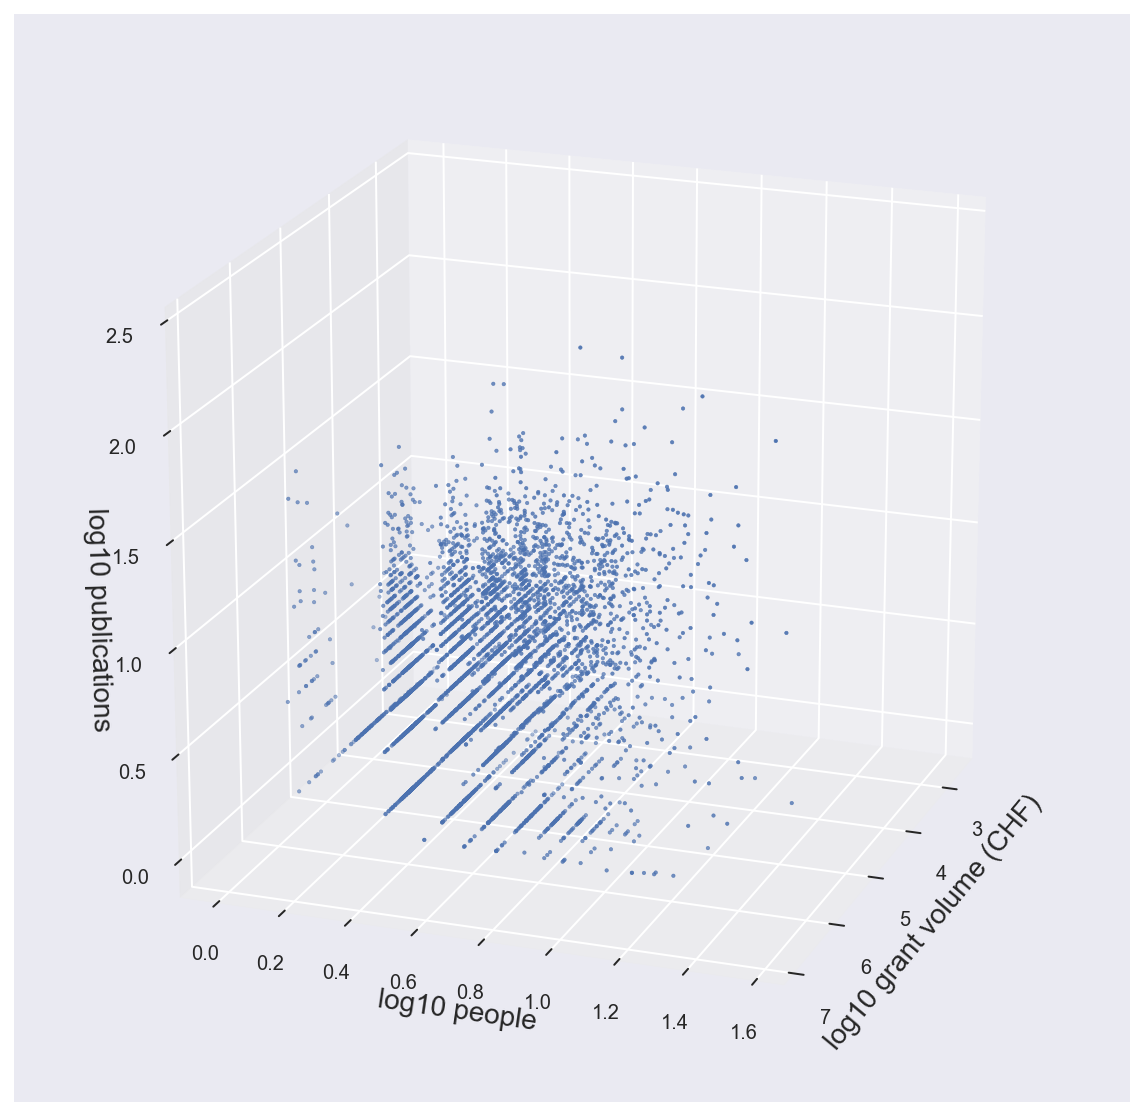

In [95]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=np.log10(grouped_by_grants_df.amount),
           ys=np.log10(grouped_by_grants_df.num_people),
           zs=np.log10(grouped_by_grants_df.num_pub),
           s=3)
#            c=scalarMap.to_rgba(four_d_plot_df['Energy (kCal)']))

## ## ##  set color code ## ## ## ## 
# scalarMap.set_array(four_d_plot_df['Energy (kCal)'])
# my_cbar = fig.colorbar(scalarMap)
# my_cbar.ax.set_title('Energy (kCal/100g)')

ax.tick_params(labelsize=10)

## ## ##  plot max plane ## ## ## ## 
# x_plane,y_plane = np.meshgrid(np.linspace(0,100,2),np.linspace(0,100,2))
# z_plane = 100 - x_plane - y_plane 

## ## ##  plot place ## ## ## 
# plt3d = fig.gca(projection='3d')
# plt3d.plot_surface(x_plane,y_plane,z_plane,
#                    color='r',alpha=0.1)

# set angles for vis
# ax.elev = 0 # grants VS pub
# ax.azim = -90 # grants VS pub
ax.elev = 20 
ax.azim = 20
# ax.dist = 8

## ## ##  set log scales ## ## ## 
# ax.yaxis.set_scale('log')
# ax.set_xscale('log')
# ax.zaxis.set_scale('log')

ax.set_xlabel('log10 grant volume (CHF)',fontsize=14)
ax.set_ylabel('log10 people',fontsize=14)
ax.set_zlabel('log10 publications',fontsize=14);

# ax.set_xlabel('grant volume (CHF)',fontsize=14)
# ax.set_ylabel('number of people',fontsize=14)
# ax.set_zlabel('number of publications',fontsize=14);

plt.savefig('./plots_for_paper/amount_pub_people_per_grant.pdf',bbox_inches='tight')

## people VS duration

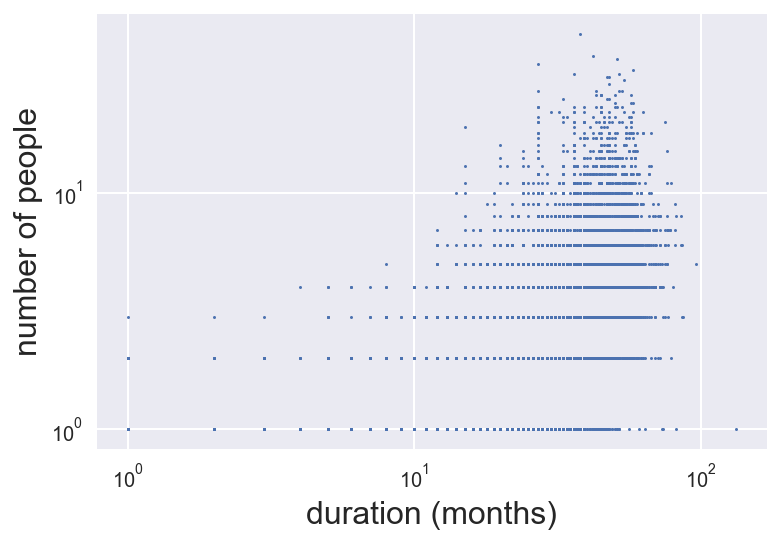

In [158]:
plt.loglog(grouped_by_grants_df.duration,grouped_by_grants_df.num_people,
                      linestyle='',marker='.',ms=3)

plt.xlabel('duration (months)',size=16)
plt.ylabel('number of people',size=16);

## pub VS duration

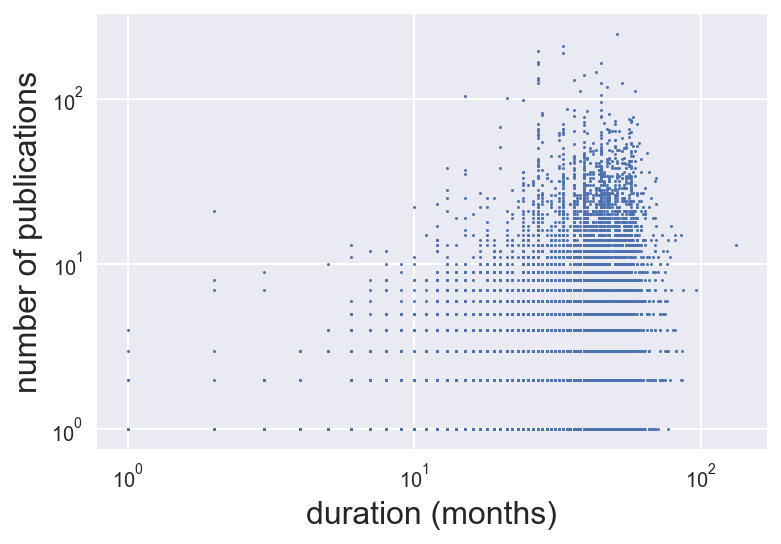

In [156]:
plt.loglog(grouped_by_grants_df.duration,grouped_by_grants_df.num_pub,
           linestyle='',marker='.',ms=3)

plt.xlabel('duration (months)',size=16)
plt.ylabel('number of publications',size=16);

## grants overview 

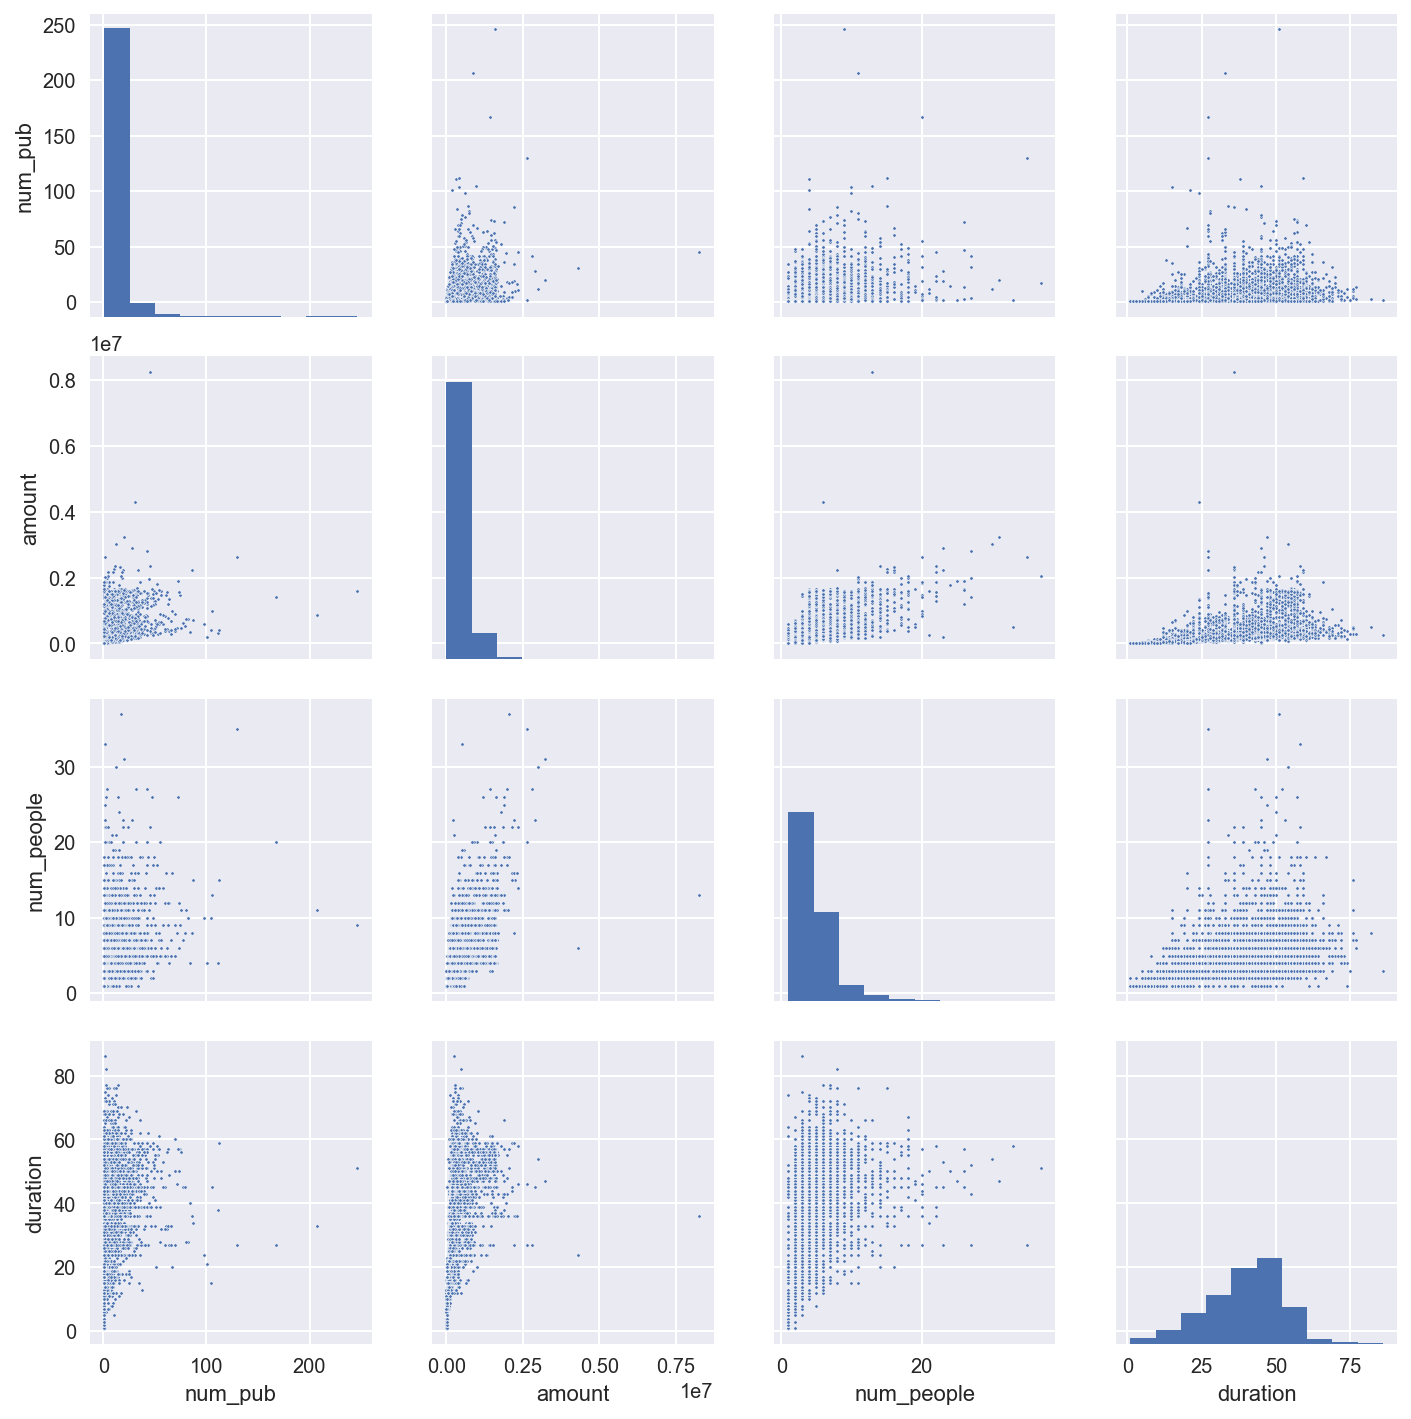

In [162]:
sns.pairplot(grouped_by_grants_df.dropna(),plot_kws={'s':3})